In [289]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

today = datetime.today().strftime('%Y-%m-%d')
start_date = '2019-01-01'

eth_df = yf.download('BTC-USD',start_date, today)

eth_df.tail()

In [290]:
today = datetime.today().strftime('%Y-%m-%d')
start_date = '2010-01-01'

eth_df = yf.download('TQQQ',start_date, today)

eth_df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-14,$69.09,$72.07,$69.00,$71.87,$71.87,89135300
2022-01-18,$68.49,$69.72,$66.06,$66.69,$66.69,77660000
2022-01-19,$67.36,$68.71,$64.16,$64.37,$64.37,91642200
2022-01-20,$66.02,$68.18,$61.50,$61.88,$61.88,86098500
2022-01-21,$60.62,$62.03,$56.50,$56.67,$56.67,170103000


In [291]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3008 entries, 2010-02-11 to 2022-01-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3008 non-null   float64
 1   High       3008 non-null   float64
 2   Low        3008 non-null   float64
 3   Close      3008 non-null   float64
 4   Adj Close  3008 non-null   float64
 5   Volume     3008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 164.5 KB


In [292]:
eth_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [293]:
eth_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [294]:
eth_df.reset_index(inplace=True)
eth_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [295]:
df = eth_df[["Date", "Open"]]

new_names = {
    "Date": "ds", 
    "Open": "y",
}

df.rename(columns=new_names, inplace=True)

In [296]:
# plot the open price

x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of Ethereum Open Price",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -91.7569
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8351.45     0.0756093       4029.32           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8768.59    0.00528911       2578.68      0.1006           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8856.95    0.00458573       3781.16      0.7511      0.7511      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8938.78    0.00283309       2401.74           1           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8984.46    0.00565707       1051.27           1           1      610   
    Iter      log prob        ||dx||      ||grad||       alpha  

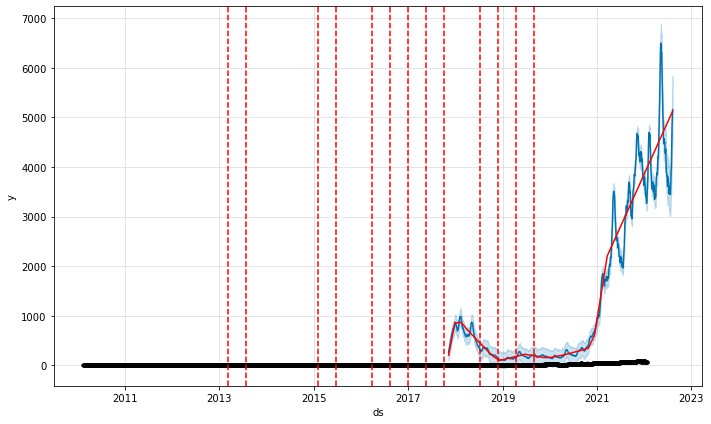

In [297]:
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(
    seasonality_mode="multiplicative",
    #changepoint_prior_scale=0.3,
    yearly_seasonality = True
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [298]:
future = m.make_future_dataframe(periods = 200)


In [299]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3203,2022-08-05,$93.99,$89.72,$98.96
3204,2022-08-06,$-132.61,$-137.95,$-127.19
3205,2022-08-07,$-132.86,$-138.54,$-127.04
3206,2022-08-08,$93.96,$89.58,$98.59
3207,2022-08-09,$95.59,$90.84,$100.22


In [300]:
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')

forecast[forecast['ds'] == next_day]['yhat'].item()

-115.8772017338293

In [301]:
plot_plotly(m, forecast)

In [302]:
plot_components_plotly(m, forecast)